In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

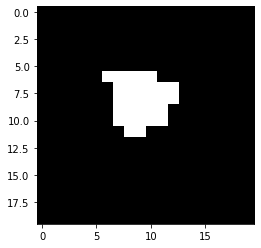

In [2]:
img = cv2.imread('figura.jpg')

blue, green, red = cv2.split(img)

ret, bw = cv2.threshold(red, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bw, cmap='gray')

In [10]:
def gradiente_perimetro(I, J, im):
    
    n = len(I)
    out = 0
    for i in range(0, n):
        out = out + gradiente(I[i],J[i],im)

    return float(out/n)


def gradiente(i,j,L):
    # funcion que calcula el gradiente
    # en la posicion posL de la imagen L
    Lx= -0.5*L[i-1,j]+0.5*L[i+1,j]
    Ly= -0.5*L[i,j-1]+0.5*L[i,j+1]
    out= sqrt(Lx**2+Ly**2)
    return out

In [5]:
#buscamos las coordenadas de los contornos 
contours, hierarchy = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contornos = np.vstack(contours[0])


In [21]:
x , y = zip(*contornos)
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

dprom = gradiente_perimetro(x,y, red)
print(f'Derivada promedio: {dprom:2.2f}')


Derivada promedio: 12.76


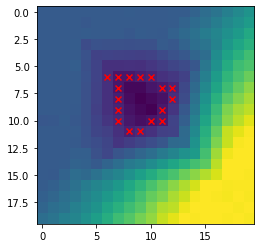

In [23]:
plt.figure()
plt.imshow(red) 
plt.scatter(x,y,marker='x', c='red')
plt.show()

In [24]:
def derivada_region(I, J, im):

    n = len(I)
    out = 0
    for i in range(0, n):
        out = out + segunda_derivada(I[i],J[i],im);   

    return float(out/n)

def segunda_derivada(i, j, L):
    #% funcion que calcula el laplaciano
    #% en la posicion posL de la imagen L
    Lxy= L[i-1,j]+L[i+1,j]+ L[i,j-1]+L[i,j+1]-4*L[i,j]
    return Lxy

Segunda derivada promedio: 8.12


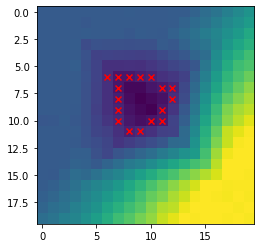

In [28]:
# calculamos la segunda derivada del perímetro
dprom = derivada_region(x,y, red)
print(f'Segunda derivada promedio: {dprom:2.2f}')
plt.figure()
plt.imshow(red) 
plt.scatter(x,y,marker='x', c='red')
plt.show()

In [37]:
def contraste(im, level):

    #imagen binaria umbralizada
    bw = im>level

    # calculamos el entorno y aplicamos 
    # una negación a la región
    ebw = np.logical_not(bw)

    # calculamos el promedio del entorno
    Ge = np.sum(im[ebw])/np.sum(ebw)
    Gr = np.sum(im[bw])/np.sum(bw)

    K1 = (Gr-Ge)/Ge
    K2 = (Gr-Ge)/(Gr+Ge)
    K3 = np.log(Gr/Ge)
    K = K1, K2, K3
    return K

Contraste K1: 1.2278636900645261
Contraste K2: 0.3803951492263853
Contraste K3: 0.8010431397915222


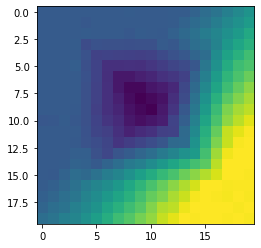

In [43]:
K = contraste(red, 80)

# Resultados del contraste
print(f'Contraste K1: {K[0]}')
print(f'Contraste K2: {K[1]}')
print(f'Contraste K3: {K[2]}')

plt.figure()
plt.imshow(red) 
plt.show()

In [46]:
from math import copysign, log10

def cambio_escala (image, factor):

    factor_times = factor
    height = int(image.shape[0] * factor_times)
    width  = int(image.shape[1] * factor_times)
    dim    = (width, height) 
    #cambio de escala 
    output = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)
    return output

Momento 0	 Original:[2.911657]	
Momento 1	 Original:[8.5911131]	
Momento 2	 Original:[11.2367052]	
Momento 3	 Original:[10.2332868]	
Momento 4	 Original:[-21.0818891]	
Momento 5	 Original:[14.5294331]	
Momento 6	 Original:[-21.163291]	


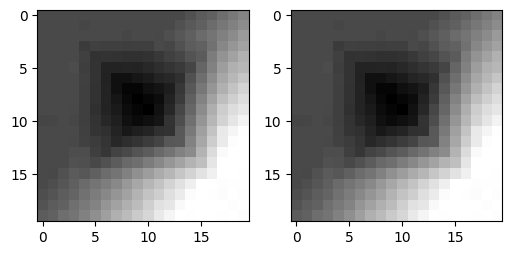

In [49]:
#extracción de los siete momentos de HU
huMoments = cv2.HuMoments(cv2.moments(red))

for i in range(0,7):
    huMoments[i] = -1* copysign(1.0, huMoments[i]) * log10(np.abs(huMoments[i]))
    print(f'Momento {i}\t Original:{huMoments[i].round(7)}\t')


plt.figure(dpi=100)
plt.subplot(121)
plt.imshow(red, cmap='gray')

plt.subplot(122)
plt.imshow(red, cmap='gray')
plt.show()